In [1]:
import pandas as pd
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
# ensure the plots are inside this notebook
%matplotlib inline

In [2]:
class neuralNetwork:
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.Wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.Who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    
    def train(self, inputs_list, targets_list):
        # convert list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        # signals into hidden layer
        hidden_inputs = np.dot(self.Wih, inputs)
        # signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # signals into final output layer
        final_inputs = np.dot(self.Who, hidden_outputs)
        # signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error = (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error = output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.Who.T, output_errors)
        
        # update Who
        self.Who += self.lr * np.dot((output_errors*final_outputs*(1.0-final_outputs)), np.transpose(hidden_outputs))
        
        # update Wih
        self.Wih += self.lr * np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
    
    
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # signals into hidden layer
        hidden_inputs = np.dot(self.Wih, inputs)
        # signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # signals into final output layer
        final_inputs = np.dot(self.Who, hidden_outputs)
        # signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

# Training Neural Network with MNIST dataset

In [3]:
# Load full training data
train_data_file = open('D:/data/MNIST/mnist_train.csv', 'r')
train_data_list = train_data_file.readlines()
train_data_file.close()

len(train_data_list)

60000

In [4]:
# create instance of Neural Network
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
# epoch is the number of times the training data set is used for training
epochs = 5

# train the neural network
for e in range(epochs):
    for record in train_data_list:
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) /255*0.99) + 0.01 
        
        # create target output values (all equals to 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [6]:
# load test data
test_data_file = open('D:/data/MNIST/mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

len(test_data_list)

10000

In [7]:
# testing the neural network
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    
    # query the neural network to generate label
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    
    correct_label = int(all_values[0])
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

# calculate the performance score
scorecard_array = np.array(scorecard)
print('performance = ', scorecard_array.sum()/scorecard_array.size)

performance =  0.959


# Find Optimal Learning Rate

In [8]:
lr_list = [0.01, 0.1, 0.2, 0.3, 0.6, 0.9]
lr_performance = []

# train the neural network with different learning rate
epochs = 5

for lr in lr_list:
    n = neuralNetwork(784, 100, 10, lr)
    
    for e in range(epochs):
        for record in train_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:]) /255*0.99) + 0.01
        
            targets = np.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
    
    
    # testing the neural network
    scorecard = []
    
    for record in test_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    
        # query the neural network to generate label
        outputs = n.query(inputs)
        label = np.argmax(outputs)
    
        correct_label = int(all_values[0])
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    # calculate the performance score
    scorecard_array = np.array(scorecard)
    performance = scorecard_array.sum()/scorecard_array.size
    lr_performance.append(performance)

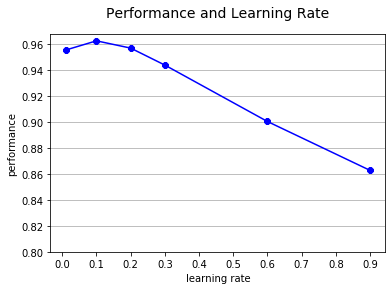

In [9]:
Data = {'Learning Rate': lr_list,
        'Performance': lr_performance
       }
  
df = pd.DataFrame(Data,columns=['Learning Rate','Performance'])
  
plt.plot(df['Learning Rate'], df['Performance'], color='blue', marker='8')
plt.title('Performance and Learning Rate', fontsize=14, y=1.05)
plt.xlabel('learning rate', fontsize=10)
plt.ylabel('performance', fontsize=10)
plt.xticks(np.arange(0,1,0.1))
plt.yticks(np.arange(0.8,0.98,0.02))
plt.grid(True, axis='y')
plt.show()

# Change Number of Hidden Nodes

In [10]:
node_list = [1, 10, 50, 100, 200, 400, 600]
node_performance = []

# train the neural network with different numbers of hidden nodes
epochs = 5

for nodes in node_list:
    n = neuralNetwork(784, nodes, 10, 0.2)
    
    for e in range(epochs):
        for record in train_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:]) /255*0.99) + 0.01
        
            targets = np.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
    
    
    # testing the neural network
    scorecard = []
    
    for record in test_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    
        # query the neural network to generate label
        outputs = n.query(inputs)
        label = np.argmax(outputs)
    
        correct_label = int(all_values[0])
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    # calculate the performance score
    scorecard_array = np.array(scorecard)
    performance = scorecard_array.sum()/scorecard_array.size
    node_performance.append(performance)

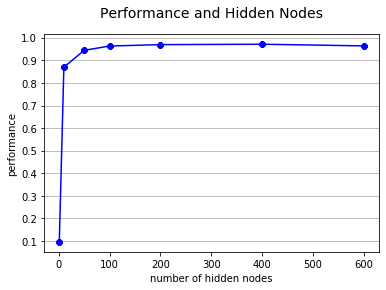

In [27]:
Data = {'Hidden Nodes': node_list,
        'Performance': node_performance
       }
  
df = pd.DataFrame(Data,columns=['Hidden Nodes','Performance'])
  
plt.plot(df['Hidden Nodes'], df['Performance'], color='blue', marker='8')
plt.title('Performance and Hidden Nodes', fontsize=14, y=1.05)
plt.xlabel('number of hidden nodes', fontsize=10)
plt.ylabel('performance', fontsize=10)
plt.xticks(np.arange(0,650,100))
plt.yticks(np.arange(0.1,1.1,0.1))
plt.grid(True, axis='y')
plt.show()

# Experiment with Different Epoch

In [12]:
epoch_list = [2, 4, 5, 6, 7, 10, 20]
epoch_performance = []

# train the neural network with different epoch
n = neuralNetwork(784, 100, 10, 0.2)

for epochs in epoch_list:
    for e in range(epochs):
        for record in train_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:]) /255*0.99) + 0.01
        
            targets = np.zeros(output_nodes) + 0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
    
    
    # testing the neural network
    scorecard = []
    
    for record in test_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    
        # query the neural network to generate label
        outputs = n.query(inputs)
        label = np.argmax(outputs)
    
        correct_label = int(all_values[0])
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)

    # calculate the performance score
    scorecard_array = np.array(scorecard)
    performance = scorecard_array.sum()/scorecard_array.size
    epoch_performance.append(performance)

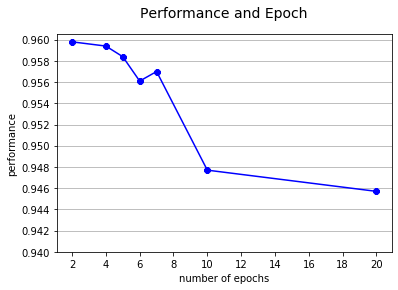

In [21]:
Data = {'Epochs': epoch_list,
        'Performance': epoch_performance
       }
  
df = pd.DataFrame(Data,columns=['Epochs','Performance'])
  
plt.plot(df['Epochs'], df['Performance'], color='blue', marker='8')
plt.title('Performance and Epoch', fontsize=14, y=1.05)
plt.xlabel('number of epochs', fontsize=10)
plt.ylabel('performance', fontsize=10)
plt.xticks(np.arange(2,21,2))
plt.yticks(np.arange(0.94,0.96,0.002))
plt.grid(True, axis='y')
plt.show()